In [245]:
#To read Dataset
import pandas as pd
#to shuffle dataset randomly
from random import shuffle


from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
import pylab as pl
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# DF TO EXCEL
from pandas import ExcelWriter
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from pandas import ExcelWriter

In [246]:
Dataset = pd.read_csv('C:\\Users\\Admin\\Desktop\\CS3123\\Data_Set\\Dataset.csv')
#pd.to_numeric(dataset)

In [262]:
#print(Dataset)

In [248]:
# Drop index and unnessery featuer 
Dataset.drop(['0', '0.1','3'], axis=1,inplace=True)
D4=Dataset.drop(Dataset.columns.to_series()["6":"445"], axis=1)

In [261]:
#D4.sort_values('4', ascending = 'True')

# Remove missing values

In [250]:
H_Data=D4.drop(D4.index[1319])
H_Data.shape

(2771, 4)

In [263]:
#The Gender Featuer is removed, so we need to ckeach how many samples doset have value in that feature
#print(H_Data.head(1320))

In [252]:
# the subset feuters(AGE(GENDER(HIGHIT(WEGHIT)))) 
H_Data=D4[np.isfinite(D4['5'])]
H_Data.shape

(2355, 4)

In [253]:
# the subset feuters(AGE(GENDER(HIGHIT(WEGHIT)))) 
w_Data=D4[np.isfinite(D4['4'])]
w_Data.shape

(2354, 4)

In [254]:
#Removing Missing values and Keeping Gender feature
w_Data.dropna(axis='rows', how='any')


,1,2,4,5
0,79,1.0,73.0,164.0
1,76,0.0,74.0,172.0
3,63,1.0,75.0,168.0
4,80,0.0,85.0,187.0
5,71,0.0,78.0,165.0
6,82,0.0,94.0,175.0
7,65,1.0,87.0,165.0
8,81,0.0,79.0,167.0
9,72,0.0,78.0,173.0
10,74,1.0,70.0,165.0


# Removing outliers from all features

# 1- Removing outliers from age 

In [255]:
D4 = w_Data[(w_Data['1']> 0)]
w_Data = w_Data[(w_Data['1']<100)]

#w_Data

In [256]:
w_Data.sort_values("1", ascending = 'True')
A_Data=w_Data
#A_Data

In [264]:
A_Data = A_Data[(A_Data['5']> 150)]
A_Data = A_Data[(A_Data['5']<190)]
A_Data.sort_values("5", ascending = 'True')
AH_Data=A_Data
#AH_Data

# 3- Removing outliers from Weight

In [258]:
AH_Data = AH_Data[(AH_Data['4']> 38)]
AH_Data = AH_Data[(AH_Data['4']<108)]
AH_Data.sort_values("4", ascending = 'True')
AHW_Data=AH_Data

# Data Classification

In [142]:
# Female subset
F_Data=AHW_Data[AHW_Data['2'] == 0.0]
#Male subset
M_Data=AHW_Data[AHW_Data['2'] == 1.0]

In [143]:
F_Data.shape

(1321, 4)

In [144]:
M_Data.shape

(878, 4)

In [145]:
F_Data.sort_values("1", ascending = 'True')
print(F_Data)

       1    2      4      5
1     76  0.0   74.0  172.0
4     80  0.0   85.0  187.0
5     71  0.0   78.0  165.0
6     82  0.0   94.0  175.0
8     81  0.0   79.0  167.0
9     72  0.0   78.0  173.0
11    57  0.0   90.0  175.0
14    65  0.0   80.0  174.0
15    82  0.0   65.0  165.0
16    67  0.0   94.0  170.0
17    66  0.0   80.0  175.0
21    51  0.0   62.0  162.0
23    82  0.0   83.0  180.0
24    77  0.0   70.0  164.0
25    89  0.0   65.0  175.0
26    76  0.0   75.0  182.0
28    76  0.0   80.0  178.0
36    61  0.0   80.0  178.0
37    58  0.0   92.0  175.0
39    68  0.0   75.0  178.0
40    76  0.0   94.0  172.0
42    74  0.0   75.0  169.0
45    61  0.0   81.0  175.0
46    70  0.0   72.0  172.0
47    60  0.0   74.0  174.0
49    71  0.0   74.0  172.0
50    66  0.0   96.0  187.0
54    65  0.0   85.0  172.0
55    76  0.0   72.0  172.0
56    80  0.0   85.0  175.0
...   ..  ...    ...    ...
2713  55  0.0   70.0  172.0
2717  71  0.0   74.0  182.0
2718  64  0.0   62.0  170.0
2721  69  0.0   92.0

In [265]:
#M_Data.sort_values("1", ascending = 'True')

# Balance Gender subset

In [147]:
# Removing 442 from female subset to blance data
#F_Data.sample(878)

In [148]:
BF_Data=F_Data.sample(878, random_state=0)

In [149]:
BF_Data.shape

(878, 4)

In [150]:
frames = [M_Data, BF_Data]

In [151]:
MF_Data = pd.concat(frames)

In [152]:
MF_Data.shape

(1756, 4)

In [153]:
MF_Data= MF_Data[(MF_Data['1']> 0)]
MF_Data =MF_Data[(MF_Data['1']<100)]

#w_Data

In [154]:
MF_Data=MF_Data.sort_values("1", ascending = 'True')

In [266]:
#MF_Data

In [163]:
#Extr Female data
x_extra_FData=F_Data[:]
x_extra_FData=F_Data.drop(['2'],axis=1)
y_extra_FData=F_Data['2']


# Data Classification

In [190]:
#Extraxtinggender lable from Male_Female_Data (MF_Data)
y = MF_Data['2']
TT=MF_Data.drop(['2'],axis=1)
X=TT[:]

In [191]:
X.shape

(1755, 3)

# Splitting the data  Training 75%/ Testin sets 25%

In [260]:
#Create Training and Test Sets and Apply Scaling
Avg_scores_LR = []
Avg_scores_DT = []
Avg_scores_KNN= []
Avg_scores_LDA= []


for x in range(10):
    seed= 1+x
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=seed)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
#Fiting data to ML Models
    #Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    scores_LR = logreg.score(X_test, y_test)
    Avg_scores_LR.append(scores_LR.mean())
    
    
    #Decision Tree
    DT = DecisionTreeClassifier().fit(X_train, y_train)
    scores_DT = DT.score(X_test, y_test)
    Avg_scores_DT.append(scores_DT.mean())
    
    #K-Nearest Neighbors
    KNN = KNeighborsClassifier()
    KNN.fit(X_train, y_train)
    scores_k= KNN.score(X_test, y_test)
    Avg_scores_KNN.append(scores_k.mean())
    
    #Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    scores_lda= lda.score(X_test, y_test)
    Avg_scores_LDA.append(scores_lda.mean())
    
    
#print(Avg_scores)
ALR=sum(Avg_scores_LR) / len(Avg_scores_LR)
print(' The avrege a ccuracy of Logistic regression classifier on test set',ALR)
      
ADT=sum(Avg_scores_DT) / len(Avg_scores_DT)
print(' The avrege a ccuracy of Decision Tree classifier on test set',ADT)
      
AKNN=sum(Avg_scores_KNN) / len(Avg_scores_KNN)
print(' The avrege a ccuracy of KNN classifier on test set',AKNN)

LDA=sum(Avg_scores_LDA) / len(Avg_scores_LDA)
print(' The avrege a ccuracy of LDA classifier on test set',LDA)

 The avrege a ccuracy of Logistic regression classifier on test set 0.7965831435079727
 The avrege a ccuracy of Decision Tree classifier on test set 0.7145785876993166
 The avrege a ccuracy of KNN classifier on test set 0.7774487471526196
 The avrege a ccuracy of LDA classifier on test set 0.7970387243735763


In [225]:
logit = LogisticRegression(random_state= 0)
logit.fit(X_train, y_train)
y_predicted = logit.predict(X_test)

# *************************END TASK 6*****************************************************

In [230]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

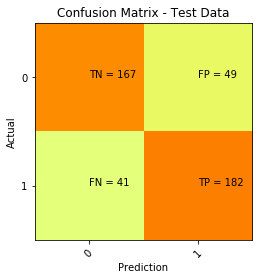

In [229]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [215]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [216]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7949886104783599


In [217]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1.0    223
0.0    216
Name: 2, dtype: int64

In [222]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[167  49]
 [ 41 182]]


In [223]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_predicted)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Metrics computed from a confusion matrix

 **Classification Accuracy:** Overall, how often is the classifier correct?

In [231]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7949886104783599
0.7949886104783599


 **Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [233]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.20501138952164008
0.2050113895216401


 **Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [235]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.8161434977578476
0.8161434977578476


 **Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [236]:
print(TN / float(TN + FP))

0.7731481481481481


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [237]:
print(FP / float(TN + FP))

0.22685185185185186


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [238]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.7878787878787878
0.7878787878787878


In [239]:
from sklearn.metrics import classification_report

pred_y = logreg.predict(X_test)
print(confusion_matrix(y_test, pred_y))
print(classification_report(y_test, pred_y))

[[167  49]
 [ 41 182]]
             precision    recall  f1-score   support

        0.0       0.80      0.77      0.79       216
        1.0       0.79      0.82      0.80       223

avg / total       0.80      0.79      0.79       439

